# ASBL Assignment
# Prithvi Raj Chauhan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 0: LOAD DATA ---
df = pd.read_csv('marketing_dataset.csv')

-----



**Q1. Load dataset and display basic info**

In [2]:
print("--- Q1 ---")
# First 10 rows
print("First 10 rows:\n", df.head(10))

# Shape (rows & columns)
print("\nShape:", df.shape)

# Summary statistics
print("\nSummary Statistics:\n", df.describe()[['Spend', 'Visitors', 'Leads', 'SiteVisits', 'Closure']])

--- Q1 ---
,First 10 rows:
,          Date     Adset      URL  Platform  Spend  Visitors  Leads  \
,0  2025-09-15   Adset-3  URL-378  WhatsApp   7999     67934   2299   
,1  2025-09-15   Adset-9  URL-301  Facebook   8988      9551   1882   
,2  2025-09-15   Adset-6  URL-246  LinkedIn   2760     27887   1966   
,3  2025-09-15   Adset-4  URL-400  Facebook  16961     11326   2042   
,4  2025-09-15  Adset-10  URL-116  Facebook  16905     96596   1369   
,5  2025-09-15  Adset-11  URL-327      Meta   5101     19381   1872   
,6  2025-09-15  Adset-13  URL-437  LinkedIn   2054      9277   1054   
,7  2025-09-15   Adset-9  URL-457  LinkedIn  11727      5335   1295   
,8  2025-09-15   Adset-7  URL-457  Facebook  13032     66438   2761   
,9  2025-09-15   Adset-8  URL-339    Google   2625     91416   2686   
,
,   SiteVisits  Closure              Project  
,0          54        4     Sunshine Meadows  
,1          77       10     Sunshine Meadows  
,2          23       24            ASBL Loft  
,

**Q2. Convert Date to datetime and sort**

In [3]:
print("\n--- Q2 ---")
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values(by='Date')
print("Data sorted by Date. First date:", df['Date'].iloc[0])


,--- Q2 ---
,Data sorted by Date. First date: 2025-09-15 00:00:00


**Q3. List all unique values**

In [4]:
print("\n--- Q3 ---")
print("Unique Platforms:", df['Platform'].unique())
print("Unique Projects:", df['Project'].unique())
print("Unique URLs:", df['URL'].unique())
print("Unique Adsets:", df['Adset'].unique())


,--- Q3 ---
,Unique Platforms: ['WhatsApp' 'Instagram' 'Meta' 'YouTube' 'Facebook' 'Google' 'LinkedIn']
,Unique Projects: ['Sunshine Meadows' 'GreenNest Residency' 'ASBL Loft' 'ASBL Lakeside'
, 'Elite Enclave' 'Skyline Towers' 'Riverfront Homes' 'ASBL Palm'
, 'ASBL Spire' 'ASBL Spectra']
,Unique URLs: ['URL-378' 'URL-412' 'URL-366' 'URL-327' 'URL-437' 'URL-164' 'URL-116'
, 'URL-339' 'URL-432' 'URL-172' 'URL-400' 'URL-424' 'URL-377' 'URL-301'
, 'URL-246' 'URL-481' 'URL-457' 'URL-356' 'URL-323' 'URL-125']
,Unique Adsets: ['Adset-3' 'Adset-5' 'Adset-2' 'Adset-9' 'Adset-14' 'Adset-12' 'Adset-1'
, 'Adset-13' 'Adset-10' 'Adset-7' 'Adset-4' 'Adset-6' 'Adset-8' 'Adset-11']


**Q4. Filter rows (Google & Visitors \> 10,000)**

In [5]:
print("\n--- Q4 ---")
filtered_df = df[(df['Platform'] == 'Google') & (df['Visitors'] > 10000)]
print(f"Rows matching criteria: {len(filtered_df)}")
print(filtered_df.head())


,--- Q4 ---
,Rows matching criteria: 264
,         Date     Adset      URL Platform  Spend  Visitors  Leads  SiteVisits  \
,29 2025-09-15  Adset-12  URL-164   Google   8987     78438   1218          91   
,32 2025-09-15  Adset-12  URL-116   Google   4454     97531   2367          56   
,34 2025-09-15  Adset-13  URL-339   Google   4890     76165   2832          22   
,36 2025-09-15   Adset-3  URL-366   Google   3652     79564   1597          36   
,9  2025-09-15   Adset-8  URL-339   Google   2625     91416   2686          11   
,
,    Closure              Project  
,29       17        ASBL Lakeside  
,32        8  GreenNest Residency  
,34       26  GreenNest Residency  
,36       27        ASBL Lakeside  
,9         8       Skyline Towers  


**Q5. Calculate CPL and find top 5 expensive Adsets**

In [6]:
print("\n--- Q5 ---")
# Create CPL Column
df['CPL'] = df['Spend'] / df['Leads']

# Top 5 expensive Adsets by CPL
top_expensive = df.sort_values(by='CPL', ascending=False)[['Adset', 'CPL']].head(5)
print("Top 5 Expensive Adsets by CPL:\n", top_expensive)


,--- Q5 ---
,Top 5 Expensive Adsets by CPL:
,          Adset        CPL
,1484  Adset-12  19.750745
,1275   Adset-4  19.309804
,295   Adset-13  19.100098
,1257   Adset-5  19.001992
,74    Adset-13  18.137464


-----

#### **Section 2 - Intermediate Data Analysis**

**Q6. Group by Platform and calculate totals/Avg**

In [7]:
print("\n--- Q6 ---")
platform_metrics = df.groupby('Platform').agg({
    'Spend': 'sum',
    'Visitors': 'sum',
    'Leads': 'sum',
    'Closure': 'sum',
    'CPL': 'mean' # Calculating Avg CPL
}).rename(columns={'CPL': 'Avg CPL'})

print(platform_metrics)


,--- Q6 ---
,             Spend  Visitors   Leads  Closure   Avg CPL
,Platform                                               
,Facebook   2936520  14445121  590784     4037  5.427284
,Google     2883009  13954264  564143     4165  5.603886
,Instagram  2862269  15198685  568086     3852  5.471391
,LinkedIn   3131366  15869864  601915     4112  5.650811
,Meta       2931312  14556931  567164     4194  5.558212
,WhatsApp   3016225  15251032  573911     3719  5.908697
,YouTube    3139955  14500902  564904     4225  6.098478


**Q7. Project with highest total Site Visits**

In [8]:
print("\n--- Q7 ---")
top_project = df.groupby('Project')['SiteVisits'].sum().idxmax()
print(f"Project with highest Site Visits: {top_project}")


,--- Q7 ---
,Project with highest Site Visits: Skyline Towers


**Q8. Daily Spend Trend per Platform (Line Chart)**


,--- Q8 (Plotting) ---


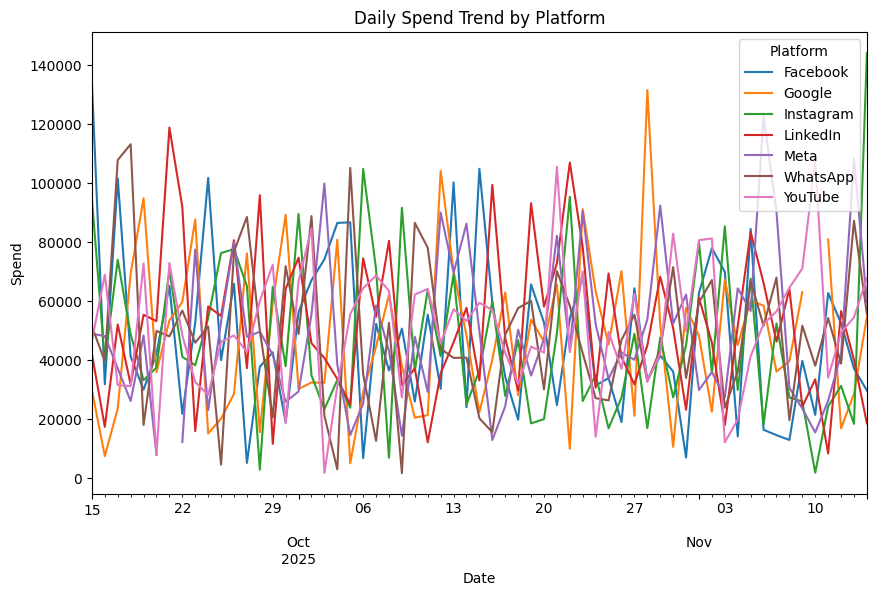

In [9]:
print("\n--- Q8 (Plotting) ---")
daily_spend = df.groupby(['Date', 'Platform'])['Spend'].sum().unstack()

daily_spend.plot(kind='line', figsize=(10, 6))
plt.title('Daily Spend Trend by Platform')
plt.ylabel('Spend')
plt.show()

**Q9. Calculate Conversion Funnel Metrics**

In [10]:
print("\n--- Q9 ---")
df['Lead Conversion Rate'] = df['Leads'] / df['Visitors']
df['Site Visit Conversion Rate'] = df['SiteVisits'] / df['Leads']
df['Closure Conversion Rate'] = df['Closure'] / df['SiteVisits']

print("Added conversion rates. New columns:", df.columns[-3:].tolist())


,--- Q9 ---
,Added conversion rates. New columns: ['Lead Conversion Rate', 'Site Visit Conversion Rate', 'Closure Conversion Rate']


**Q10. Anomaly Detection (Visitors or Leads \> 2 Std Dev)**

In [11]:
print("\n--- Q10 ---")
# Calculate mean and std
vis_mean, vis_std = df['Visitors'].mean(), df['Visitors'].std()
leads_mean, leads_std = df['Leads'].mean(), df['Leads'].std()

# Filter anomalies
anomalies = df[
    (df['Visitors'] > vis_mean + (2 * vis_std)) |
    (df['Leads'] > leads_mean + (2 * leads_std))
]
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies[['Date', 'Visitors', 'Leads']].head())


,--- Q10 ---
,Number of anomalies detected: 0
,Empty DataFrame
,Columns: [Date, Visitors, Leads]
,Index: []


-----

#### **Section 3 - Advanced Python Analysis**

**Q11. Best-performing Adset within each Platform (Highest Closure)**

In [12]:
print("\n--- Q11 ---")
# Group by Platform and Adset, sum Closures
adset_performance = df.groupby(['Platform', 'Adset'])['Closure'].sum().reset_index()

# Find max closure for each platform
best_adsets = adset_performance.loc[adset_performance.groupby('Platform')['Closure'].idxmax()]
print(best_adsets)


,--- Q11 ---
,     Platform     Adset  Closure
,6    Facebook   Adset-2      408
,24     Google   Adset-6      525
,35  Instagram   Adset-3      345
,45   LinkedIn  Adset-12      396
,58       Meta  Adset-11      429
,79   WhatsApp   Adset-5      433
,89    YouTube  Adset-14      476


**Q12. Correlation Heatmap**


,--- Q12 (Plotting) ---


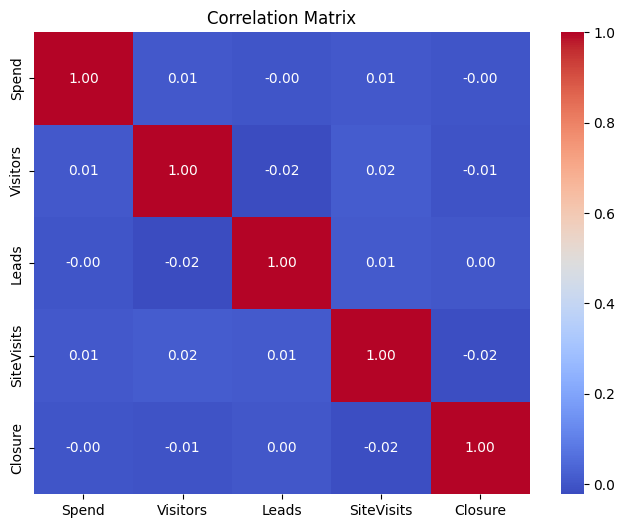

In [13]:
print("\n--- Q12 (Plotting) ---")
corr_matrix = df[['Spend', 'Visitors', 'Leads', 'SiteVisits', 'Closure']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Q13. Daily Dashboard Dataframe & Save to CSV**

In [14]:
print("\n--- Q13 ---")
daily_dashboard = df.groupby('Date').agg({
    'Spend': 'sum',
    'Leads': 'sum',
    'Visitors': 'sum',
    'SiteVisits': 'sum',
    'Closure': 'sum'
})

print(daily_dashboard.head())
# Saving to CSV
daily_dashboard.to_csv('daily_dashboard_summary.csv')
print("Saved to 'daily_dashboard_summary.csv'")


,--- Q13 ---
,             Spend  Leads  Visitors  SiteVisits  Closure
,Date                                                    
,2025-09-15  447989  87236   2228024        2492      662
,2025-09-16  253477  56993   1209978        1225      309
,2025-09-17  428229  63508   1578309        1895      491
,2025-09-18  361895  63047   1832557        1571      382
,2025-09-19  352905  67242   1707555        1903      560
,Saved to 'daily_dashboard_summary.csv'


**Q14. [cite\_start]Project Funnel Summary [cite: 62-63]**

In [15]:
print("\n--- Q14 ---")
project_funnel = df.groupby('Project')[['Visitors', 'Leads', 'SiteVisits', 'Closure']].sum()
print(project_funnel)


,--- Q14 ---
,                     Visitors   Leads  SiteVisits  Closure
,Project                                                   
,ASBL Lakeside        11508590  434182       10908     3066
,ASBL Loft            10449957  361803        9461     2501
,ASBL Palm             9243689  392933        9052     2840
,ASBL Spectra          9533411  380669        9480     2722
,ASBL Spire           11533066  435083       10172     3068
,Elite Enclave        10564029  387880        9153     2839
,GreenNest Residency   9975586  393216        9774     3044
,Riverfront Homes      8700737  363999        9077     2402
,Skyline Towers       11815964  473821       11266     2982
,Sunshine Meadows     10451770  407321        9612     2840


-----

#### **Section 4 - Visualisation Tasks**

**Q15. Scatter Plot: Spend vs Leads**


,--- Q15 (Plotting) ---


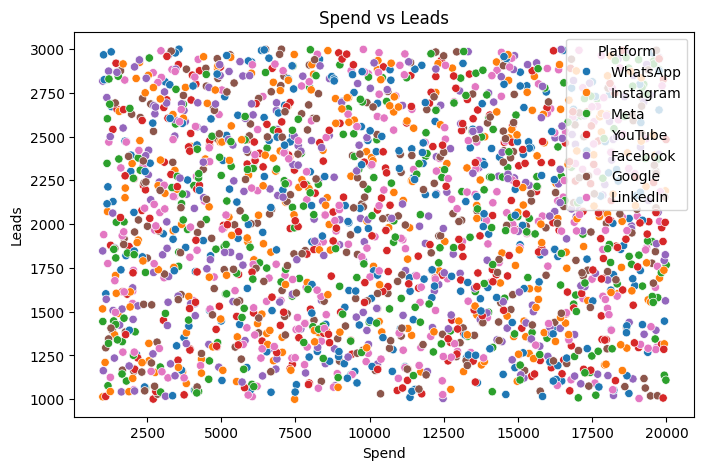

In [16]:
print("\n--- Q15 (Plotting) ---")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Spend', y='Leads', hue='Platform')
plt.title('Spend vs Leads')
plt.show()

**Q16. Bar Chart: Average Closure per Platform**


,--- Q16 (Plotting) ---


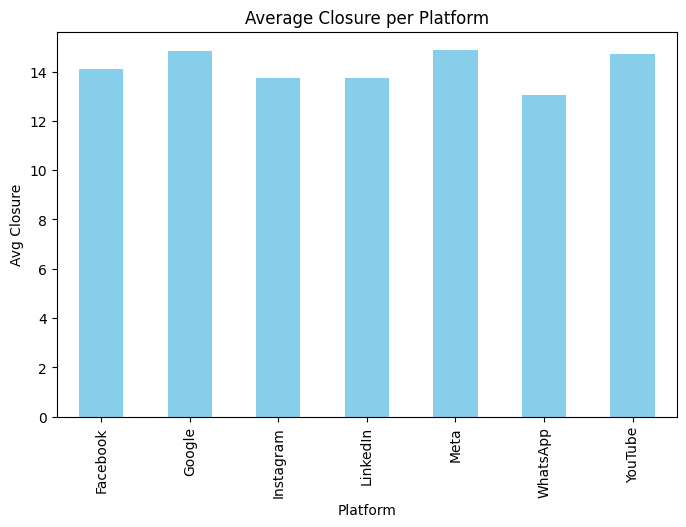

In [17]:
print("\n--- Q16 (Plotting) ---")
avg_closure = df.groupby('Platform')['Closure'].mean()
avg_closure.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Average Closure per Platform')
plt.ylabel('Avg Closure')
plt.show()

**Q17. Line Chart: Daily Visitors for 3 Platforms**






,--- Q17 (Plotting) ---


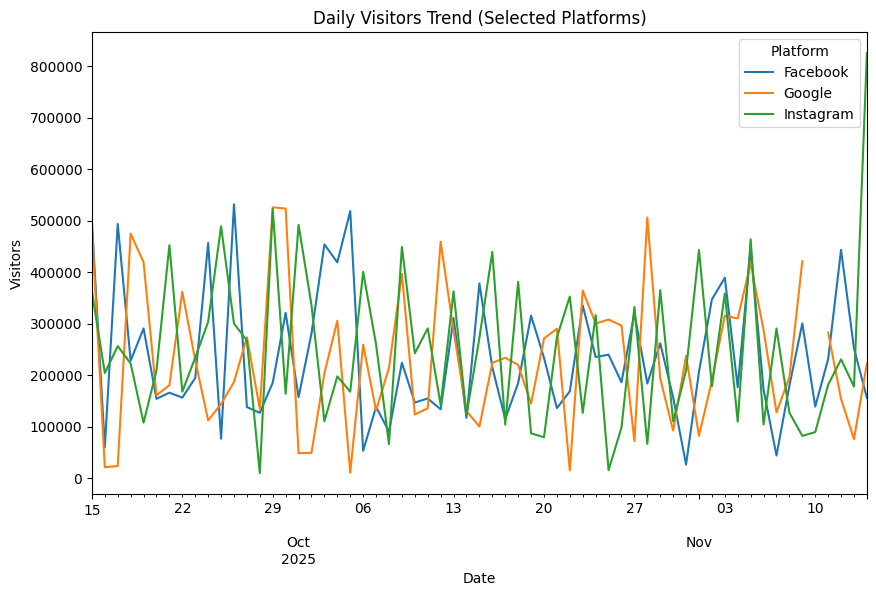

In [18]:
print("\n--- Q17 (Plotting) ---")
# Selecting 3 platforms (Assuming Google, Facebook, Instagram exist in data)
selected_platforms = ['Google', 'Facebook', 'Instagram']
subset = df[df['Platform'].isin(selected_platforms)]

pivot_visitors = subset.groupby(['Date', 'Platform'])['Visitors'].sum().unstack()
pivot_visitors.plot(kind='line', figsize=(10, 6))
plt.title('Daily Visitors Trend (Selected Platforms)')
plt.ylabel('Visitors')
plt.show()

**Q18. Platform-wise Performance Dashboard (4 Subplots)**





,--- Q18 (Plotting) ---


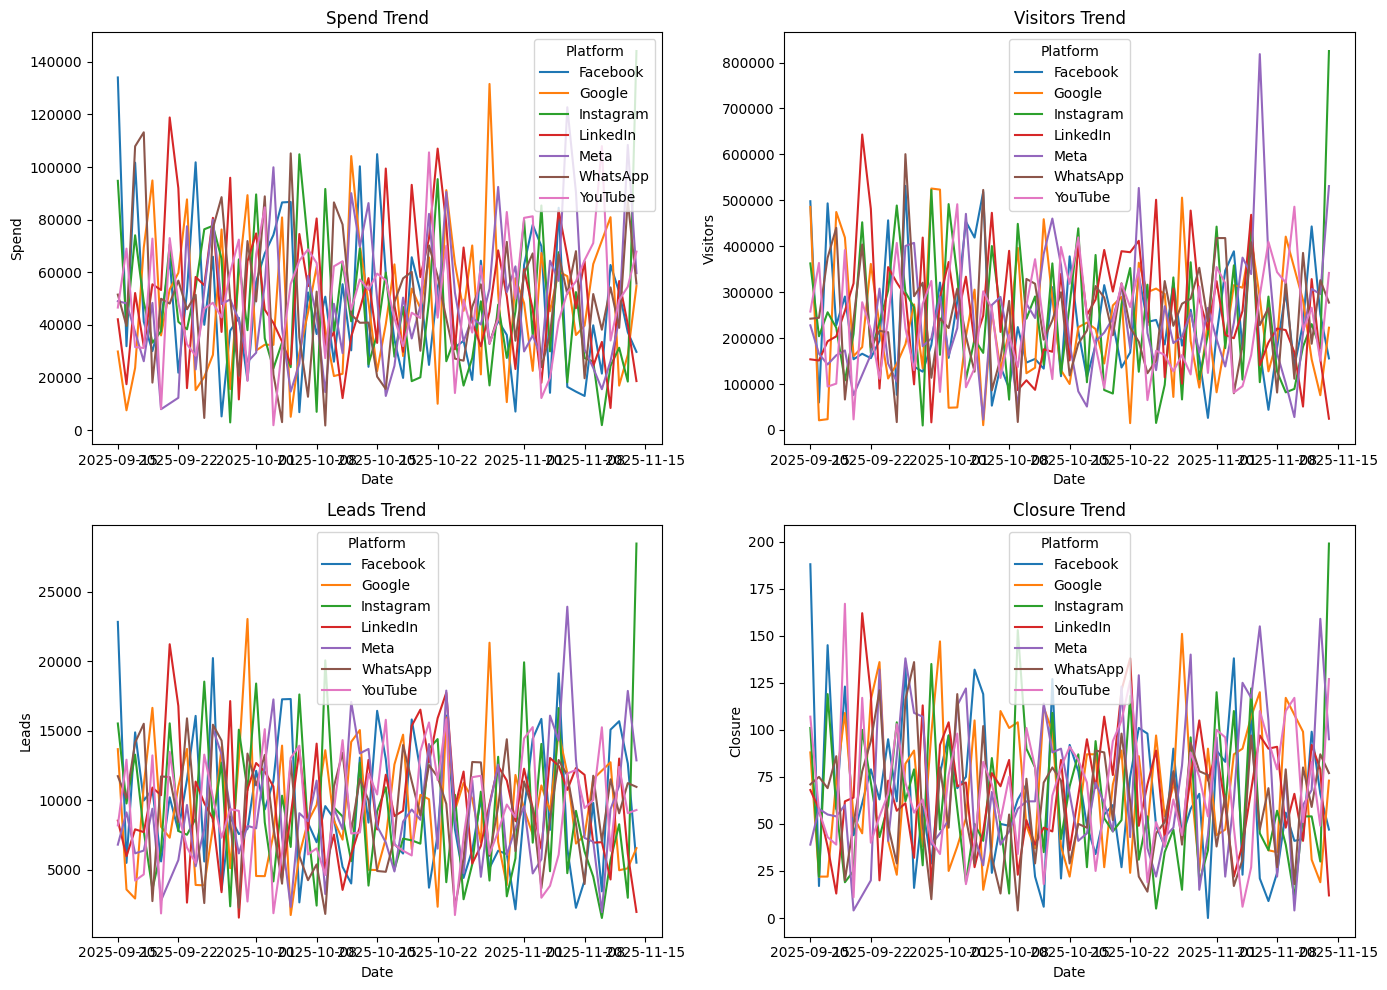

In [19]:
print("\n--- Q18 (Plotting) ---")
# Aggregating data by Date and Platform
dashboard_data = df.groupby(['Date', 'Platform'])[['Spend', 'Visitors', 'Leads', 'Closure']].sum().reset_index()

# Initialize figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Chart 1: Spend Trend
sns.lineplot(data=dashboard_data, x='Date', y='Spend', hue='Platform', ax=axes[0, 0])
axes[0, 0].set_title('Spend Trend')

# Chart 2: Visitors Trend
sns.lineplot(data=dashboard_data, x='Date', y='Visitors', hue='Platform', ax=axes[0, 1])
axes[0, 1].set_title('Visitors Trend')

# Chart 3: Leads Trend
sns.lineplot(data=dashboard_data, x='Date', y='Leads', hue='Platform', ax=axes[1, 0])
axes[1, 0].set_title('Leads Trend')

# Chart 4: Closure Trend
sns.lineplot(data=dashboard_data, x='Date', y='Closure', hue='Platform', ax=axes[1, 1])
axes[1, 1].set_title('Closure Trend')

plt.tight_layout()
plt.show()